In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape


(8124, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.describe(include = "object")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
for column in data.columns:
    print(f"{column} -> {data[column].nunique()}, {data[column].unique()}")

class -> 2, ['p' 'e']
cap-shape -> 6, ['x' 'b' 's' 'f' 'k' 'c']
cap-surface -> 4, ['s' 'y' 'f' 'g']
cap-color -> 10, ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises -> 2, ['t' 'f']
odor -> 9, ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment -> 2, ['f' 'a']
gill-spacing -> 2, ['c' 'w']
gill-size -> 2, ['n' 'b']
gill-color -> 12, ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape -> 2, ['e' 't']
stalk-root -> 5, ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring -> 4, ['s' 'f' 'k' 'y']
stalk-surface-below-ring -> 4, ['s' 'f' 'y' 'k']
stalk-color-above-ring -> 9, ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring -> 9, ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type -> 1, ['p']
veil-color -> 4, ['w' 'n' 'o' 'y']
ring-number -> 3, ['o' 't' 'n']
ring-type -> 5, ['p' 'e' 'l' 'f' 'n']
spore-print-color -> 9, ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population -> 6, ['s' 'n' 'a' 'v' 'y' 'c']
habitat -> 7, ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [8]:
data["stalk-root"].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [9]:
data["stalk-root"].replace(["?"], ["missing"], inplace=True)

In [10]:
data["stalk-root"].value_counts()

b          3776
missing    2480
e          1120
c           556
r           192
Name: stalk-root, dtype: int64

In [11]:
#Extracting features

In [12]:
X = data.drop(columns=['class', 'veil-type'], axis = 1)
y = data['class']

In [13]:
onehot_columns = []
label_columns = []
for column in X.columns:
    label_columns.append(column) if X[column].nunique()>3 else onehot_columns.append(column)
print(f"Onehot columns = {onehot_columns}")
print(f"Label columns = {label_columns}")

Onehot columns = ['bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 'ring-number']
Label columns = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [14]:
# Onehot encode
X = pd.get_dummies(data = X, columns=onehot_columns)

In [15]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
for column in label_columns:
    X[column] = LabelEncoder().fit_transform(X[column])

In [16]:
#Split data sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [18]:
#Check Model Accuracy

In [19]:
# Function to check model performances
from sklearn.metrics import classification_report, confusion_matrix
def check_model_metrices(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

In [20]:
#1. Multi Logistic Rregression

In [21]:
from sklearn.linear_model import LogisticRegression
rf = LogisticRegression().fit(X_train, y_train)
rf_pred = rf.predict(X_test)
check_model_metrices(y_test, rf_pred)

              precision    recall  f1-score   support

           e       0.98      0.95      0.96       843
           p       0.95      0.98      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Confusion Matrix = 
 [[801  42]
 [ 18 764]]


C:\Users\Minnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#2. Linear SVM

In [23]:
from sklearn.svm import SVC
linear = SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)
check_model_metrices(y_test, linear_pred)

              precision    recall  f1-score   support

           e       0.98      0.95      0.97       843
           p       0.95      0.98      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.97      0.96      1625
weighted avg       0.97      0.96      0.96      1625

Confusion Matrix = 
 [[800  43]
 [ 14 768]]


In [24]:
#3. kNN Classifier

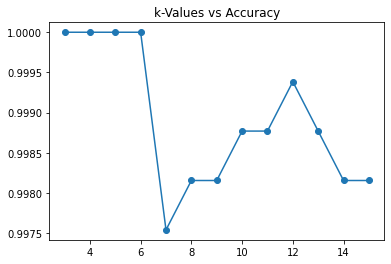

Best k value =  3
kNN classifier with k = 3 has :: 

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix = 
 [[843   0]
 [  0 782]]


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def generate_kNN_model(x_train, y_train, x_test, k):
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn_model.fit(x_train, y_train)
    return knn_model.predict(x_test)

# Optimizing 'k' or 'n-neighbers' value
def find_optimal_k(x_train, y_train, x_test):
    accur_dict = dict()
    for k in np.arange(3,16):
        y_pred = generate_kNN_model(x_train, y_train, x_test, k)
        accur_dict[k] = accuracy_score(y_test, y_pred)
    #Plot
    plt.plot(list(accur_dict.keys()),list(accur_dict.values()), marker ='o')
    plt.title('k-Values vs Accuracy')
    plt.show()
    optimal_k = max(accur_dict, key = lambda x: accur_dict[x])
    print('Best k value = ', optimal_k)
    return optimal_k
k_optimal = find_optimal_k(X_train, y_train, X_test)
knn_y_pred = generate_kNN_model(X_train, y_train, X_test, k_optimal)
print(f'kNN classifier with k = {k_optimal} has :: \n')
check_model_metrices(y_test, knn_y_pred)

In [26]:
#4. Decision Trees

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
check_model_metrices(y_test, linear_pred)

              precision    recall  f1-score   support

           e       0.98      0.95      0.97       843
           p       0.95      0.98      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.97      0.96      1625
weighted avg       0.97      0.96      0.96      1625

Confusion Matrix = 
 [[800  43]
 [ 14 768]]


It is inferred that kNN classifier generated best results with 100% accuracy.